In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Activation
class Activation:
  def __init__(self):
    self.value = 0
  def forward(self, x):
    None
  def derivate(self):
    None

class Identity(Activation):
  def forward(self, x):
    return x
  def derivate(self):
    return 1

class Sigmoid(Activation):
  def forward(self, x):
      self.value =  1 / (1 + np.exp(-x))
      return self.value
  def derivate(self):
      return self.value * (1 - self.value)

class Tanh(Activation):
  def forward(self, x):
      self.value = np.tanh(x)
      return self.value
  def derivate(self):
      return 1 - (self.value ** 2)

In [ ]:
#Layer
class Layer:
  def __init__(self, input_size, output_size, activation : Activation):
    self.input_size = input_size
    self.output_size = output_size
    self.activation = activation
    self.weight = np.random.randn(output_size, input_size) * np.sqrt(1. / output_size) #Xavier 초기화 사용
    self.bias = np.random.randn(output_size, 1)
    self.a = None

  def forward(self, a):
    self.a = a #이전 layer의 forwarding 결과값
    w_sum = np.dot(self.weight, a) + self.bias #weight와 a를 내적 + bias
    val = self.activation.forward(w_sum) #activation function 적용
    return val

  def backward(self, diff):
    loss =  diff * self.activation.derivate() #차이값 * activation function 값의 미분값
    delta = np.outer(loss, self.a) #위에서 구한 loss와 self.a를 외적
    diff = np.dot(self.weight.T, loss) #weight와 위에서 구한 loss로 diff 다시구하기
    return delta, diff

In [ ]:
#Model
class Model:
  def __init__(self, epochs, learn_rate, print_rate):
    self.layers = []
    self.epochs = epochs
    self.learn_rate = learn_rate
    self.print_rate = print_rate

  def add(self, input_size, output_size, activation : Activation):
    self.layers.append(Layer(input_size, output_size, activation))

  def forward_propagation(self, x):
    a = x
    for layer in self.layers:
      a = layer.forward(a)
    return a

  def back_propagation(self, y, y_pred): #역전파
    diff = (y_pred - y) / y_pred.shape[0] #오차값을 정규화
    update = []
    for layer in list(reversed(self.layers)):
      delta, diff = layer.backward(diff) #뒤의 layer의 diff를 전파받아 사용
      update.append(delta)
    for delta, layer in zip(reversed(update), self.layers):
      layer.weight -= self.learn_rate * delta #최종 weight 갱신

  def training(self, x_data, y_data):
    for epoch in range(1, self.epochs+1):
      train_loss = []
      for x, y in zip(x_data, y_data):
        y_pred = self.forward_propagation(x)
        mse = 0.5 * ((y - y_pred) ** 2) #squared error 계산
        train_loss.append(mse)
        self.back_propagation(y, y_pred)
      train_loss = np.array(train_loss).mean() #Training MSE 계산

      if (epoch % self.print_rate == 0): #Training MSE 출력
        print(f"Epoch : {epoch}\t|\tMSE : {train_loss}")

  def predict(self, x):
    tmp = []
    for _x in x:
      tmp.append(self.forward_propagation(_x))
    return np.array(tmp)

  def params(self): #파라메터 출력 함수
    for idx, layer in list(enumerate(self.layers)):
      print(f"--------------- Layer {idx} Info ---------------")
      print(f"Weight : {layer.weight}")
      print(f"Bias : {layer.bias}")
      print()


In [5]:
#데이터 변환
test = pd.read_csv("/content/drive/MyDrive/hw2_data.csv")
x = np.array(test.x)
y = np.array(test.y)

In [ ]:
#모델에 layer 추가
model = Model(1000, 0.001, 50)
model.add(1, 16, Tanh()) #input layer
model.add(16, 32, Tanh()) #hidden layer
model.add(32, 16, Tanh()) #hidden layer
model.add(16, 1, Identity()) #output layer

In [ ]:
#같은 시드를 설정하여 일정한 난수값이 나오게 한다
np.random.seed(1124)
#80%를 훈련 데이터로, 20%를 검증(테스트) 데이터로 사용
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=1124)
model.training(x_train, y_train)

Epoch : 50	|	MSE : 0.007311736136646351
Epoch : 100	|	MSE : 0.0036509529419027644
Epoch : 150	|	MSE : 0.002375691107906756
Epoch : 200	|	MSE : 0.0018202958185887413
Epoch : 250	|	MSE : 0.0015028370452865555
Epoch : 300	|	MSE : 0.0012916842437933906
Epoch : 350	|	MSE : 0.001131359407842822
Epoch : 400	|	MSE : 0.001003162765347489
Epoch : 450	|	MSE : 0.0008986048800496735
Epoch : 500	|	MSE : 0.000811954932360077
Epoch : 550	|	MSE : 0.000738898645514738
Epoch : 600	|	MSE : 0.0006761817515096913
Epoch : 650	|	MSE : 0.0006213547370750496
Epoch : 700	|	MSE : 0.0005725452296644274
Epoch : 750	|	MSE : 0.0005282821853196431
Epoch : 800	|	MSE : 0.00048738723390488135
Epoch : 850	|	MSE : 0.00044894114750063894
Epoch : 900	|	MSE : 0.00041233126140026113
Epoch : 950	|	MSE : 0.00037736092272227807
Epoch : 1000	|	MSE : 0.0003443274415285464


In [ ]:
#Validation MSE 출력
y_pred = model.predict(x_valid)
print(f"Validation MSE : {((y_valid - y_pred)**2).mean()}")

Validation MSE : 2.6384643495627893


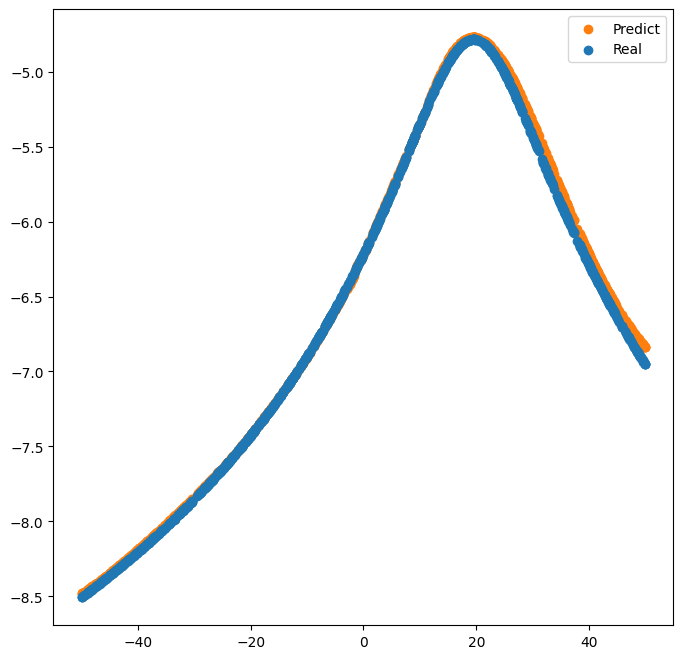

--------------- Layer 0 Info ---------------
Weight : [[ 0.15574732]
 [-0.0282473 ]
 [-0.02502161]
 [ 0.02680205]
 [ 0.07364103]
 [ 0.52044712]
 [ 0.49853732]
 [-0.01704538]
 [ 0.16870531]
 [-0.14159634]
 [-0.16671608]
 [ 0.23695805]
 [-0.44379412]
 [ 0.05442475]
 [-0.10688102]
 [ 0.01744933]]
Bias : [[-1.36647348]
 [-0.68329681]
 [-1.17306562]
 [ 0.77290822]
 [ 0.96170935]
 [ 1.21796403]
 [ 1.80110592]
 [-1.31053519]
 [ 1.09138134]
 [-0.32565506]
 [-0.48367433]
 [-0.74447295]
 [-0.38702271]
 [-0.68036143]
 [-0.99094709]
 [ 2.37716364]]

--------------- Layer 1 Info ---------------
Weight : [[ 4.07838548e-02  2.57596672e-01 -1.23069080e-01  1.73341032e-01
   4.51683151e-01 -1.32559054e-01 -3.61561745e-04  1.81245535e-01
   1.46080887e-01 -3.38241179e-01  8.39415716e-02  1.08288622e-01
   2.40697751e-02 -1.15560277e-01 -8.93456125e-02  4.42021809e-02]
 [ 3.12943495e-02 -2.99377626e-01 -2.27050792e-02 -3.09579816e-02
   1.25933646e-01  1.40182287e-01  1.65266142e-01 -2.13509130e-01
   1.

In [ ]:
#Print
plt.figure(figsize=(8, 8))
plt.scatter(x_valid, y_pred, color='tab:orange', label="Predict")
plt.scatter(x_valid, y_valid, color='tab:blue', label="Real")
plt.legend()
plt.show()

#Show Parameters
model.params()